<a href="https://colab.research.google.com/github/UsmanShafeeq/Advanced-Machine-Learning-Project/blob/main/Lecture_Notes_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

To implement linear regression, we can use a common dataset, such as the Boston Housing dataset, which is used for predicting the price of houses based on various features. However, this dataset is not directly available in sklearn due to ethical concerns, so we can use an alternative dataset, such as the California Housing dataset, which serves a similar purpose.

Here is a complete example of how to load the dataset, prepare the data, train a linear regression model, and visualize the results.

**Step 1: Import Libraries and Load Dataset**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Adding target to the DataFrame

In [ ]:
# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Step 2: Prepare the Data**

We'll use only one feature for simplicity. Let's select MedInc (median income) to predict MedHouseVal (median house value).

In [ ]:
# Select the feature and target variable
X = df[['MedInc']].values #Using median income as the predictor
y = df['MedHouseVal'].values  # Target variable is median house value

 Split data into training and testing sets

In [ ]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Step 3: Train the Linear Regression Model**

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Step 4: Evaluate the Model

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7091157771765549


In [ ]:
# Display the model's coefficient and intercept
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Coefficient: 0.4193384939381271
Intercept: 0.4445972916907879


Step 5: Visualize the Results

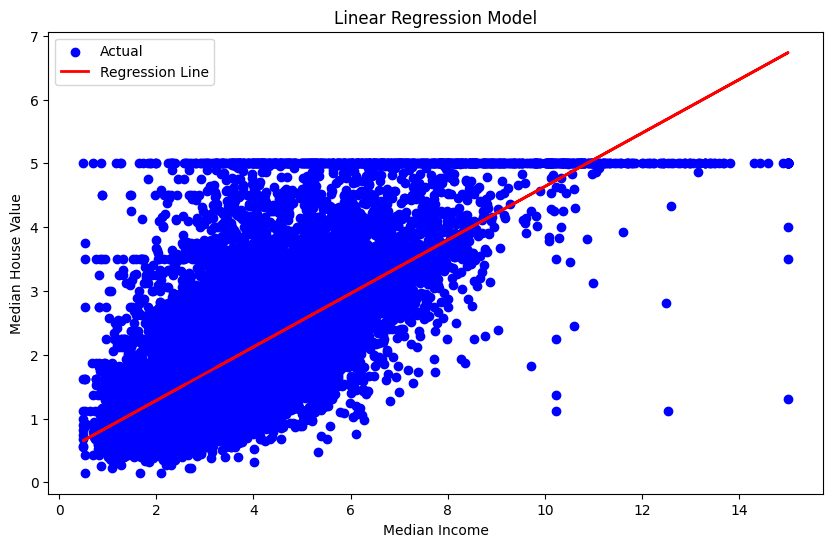

In [ ]:
# Plot the training data along with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression Model')
plt.legend()

Linear Regression is a relatively simple model with limited parameters for hyperparameter tuning. However, in scenarios where overfitting or underfitting might be a concern, we can regularize it using techniques like Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization). These introduce additional hyperparameters, alpha (or lambda), which control the amount of regularization applied.

Let's explore these regularized forms and how we can tune them to improve model performance:

1. Ridge Regression (L2 Regularization)
In Ridge Regression, we add a penalty equal to the square of the magnitude of coefficients, which reduces overfitting by shrinking the coefficients but does not make them zero.

2. Lasso Regression (L1 Regularization)
In Lasso Regression, we add a penalty equal to the absolute magnitude of coefficients, which can shrink some coefficients to zero, effectively performing feature selection.

**Hyperparameter Tuning with Grid Search**

We can use GridSearchCV to try different values of alpha and find the best model. Here’s how to set it up:

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameters grid
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [ ]:
# Initialize Ridge and Lasso regressors
ridge = Ridge()
lasso = Lasso()

In [ ]:
# Set up GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge, ridge_params,scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Set up GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso, lasso_params,scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get best parameters and score for Ridge
print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)


Best Ridge Alpha: {'alpha': 10}
Best Ridge Score: -0.6992830126300691


In [ ]:
# Get best parameters and score for Lasso
print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso Score:", lasso_grid.best_score_)

Best Lasso Alpha: {'alpha': 0.01}
Best Lasso Score: -0.6993097312100334


Explanation
Alpha (or Lambda): Controls the regularization strength. A larger alpha penalizes the coefficients more, reducing variance but increasing bias.
Grid Search: GridSearchCV will evaluate multiple values for alpha and select the one that minimizes the Mean Squared Error (or other metrics).
This approach allows for optimal hyperparameter tuning, helping to reduce overfitting or underfitting and improving generalization on unseen data.

# Lecture: k-Nearest Neighbors (kNN) Classification

**# Lecture: k-Nearest Neighbors (kNN) Classification**

**## What is k-Nearest Neighbors?**
k-Nearest Neighbors (kNN) is a simple, non-parametric, and lazy supervised learning algorithm used for both classification and regression tasks. It works by identifying the "k" closest data points in the training dataset to a new input point and using these points to predict the label of the new point.

---

**## How kNN Works**
1. **Choose the number of neighbors (k)**: Decide how many neighbors you want to consider. A common choice is odd numbers (e.g., 3, 5, or 7) to avoid ties in classification.

2. **Calculate distance**: For a new data point, calculate the distance to every point in the training set. Common distance metrics include:
   - **Euclidean Distance**: The most commonly used distance measure, calculated as:
     \[
     d = \sqrt{\sum (x_2 - x_1)^2}
     \]
   - **Manhattan Distance**: Sum of absolute differences:
     \[
     d = \sum |x_2 - x_1|
     \]

3. **Find k-nearest neighbors**: Select the "k" data points with the smallest distance to the query point.

4. **Vote for majority label (Classification)**: For classification, the new point is labeled with the majority label among its k-nearest neighbors.

5. **Average (Regression)**: For regression, the average of the k-nearest neighbors' values is used.

---

**## Example: Classifying Fruit Type**
Let's take a dataset with two features: **Weight** and **Color**, and try to classify fruits as either "Apple" or "Orange."

| Fruit ID | Weight (grams) | Color (1 = Red, 2 = Orange) | Label  |
|----------|-----------------|-----------------------------|--------|
| A        | 150             | 1                           | Apple  |
| B        | 130             | 1                           | Apple  |
| C        | 180             | 2                           | Orange |
| D        | 160             | 2                           | Orange | **bold text**

Assume a new fruit has:
- **Weight**: 140 grams
- **Color**: Red (1)

We want to predict whether it’s an Apple or Orange.

**### Steps for Prediction (k = 3)**

1. **Calculate Distances**: Calculate the Euclidean distance between the new fruit and each of the fruits in the dataset using the formula:
   \[
   d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
   \]
   where \(x_1\) and \(y_1\) are the Weight and Color of the new fruit, and \(x_2\) and \(y_2\) are the Weight and Color of the known fruits.

   - **Distance to A**:
     \[
     d = \sqrt{(150 - 140)^2 + (1 - 1)^2} = \sqrt{10^2 + 0} = 10
     \]

   - **Distance to B**:
     \[
     d = \sqrt{(130 - 140)^2 + (1 - 1)^2} = \sqrt{10^2 + 0} = 10
     \]

   - **Distance to C**:
     \[
     d = \sqrt{(180 - 140)^2 + (2 - 1)^2} = \sqrt{40^2 + 1} = \sqrt{1600 + 1} \approx 40.01
     \]

   - **Distance to D**:
     \[
     d = \sqrt{(160 - 140)^2 + (2 - 1)^2} = \sqrt{20^2 + 1} = \sqrt{400 + 1} \approx 20.02
     \]

2. **Find k-Nearest Neighbors**: Select the 3 nearest neighbors based on the calculated distances.
   - Distances: A (10), B (10), D (20.02)
   - **k-Nearest Neighbors**: A, B, and D

3. **Majority Voting**: Classify the new fruit based on the majority label of the nearest neighbors.
   - Neighbors' Labels: A (Apple), B (Apple), D (Orange)
   - **Majority Label**: Apple

**### Result**
Based on the k-Nearest Neighbors algorithm (k = 3), the new fruit is classified as an **Apple**.

**Code Implementation in Python**

In [ ]:
import numpy as np
from scipy.spatial import distance
from collections import Counter

# Sample dataset
data = [
    {"weight": 150, "color": 1, "label": "Apple"},
    {"weight": 130, "color": 1, "label": "Apple"},
    {"weight": 180, "color": 2, "label": "Orange"},
    {"weight": 160, "color": 2, "label": "Orange"}
]

# New fruit data point
new_fruit = {"weight": 140, "color": 1}

# Number of neighbors to consider
k = 3

# Calculate Euclidean distance from the new fruit to each fruit in the dataset
distances = []
for fruit in data:
    dist = distance.euclidean(
        (new_fruit["weight"], new_fruit["color"]),
        (fruit["weight"], fruit["color"])
    )
    distances.append((dist, fruit["label"]))

# Sort distances and select the k-nearest neighbors
distances.sort(key=lambda x: x[0])
nearest_neighbors = distances[:k]

# Get the labels of the nearest neighbors
neighbor_labels = [label for _, label in nearest_neighbors]

# Determine the most common label (majority vote)
most_common_label = Counter(neighbor_labels).most_common(1)[0][0]

print(f"The predicted label for the new fruit is: {most_common_label}")


The predicted label for the new fruit is: Apple


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Dataset: Weight, Color (1 = Red, 2 = Orange), Label (0 = Apple, 1 = Orange)
X = np.array([[150, 1], [130, 1], [180, 2], [160, 2]])  # Features (Weight and Color)
y = np.array([0, 0, 1, 1])  # Labels (0 = Apple, 1 = Orange)

# Initialize kNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X, y)

# New data point: Weight = 140, Color = Red (1)
new_fruit = np.array([[140, 1]])

# Predict the label of the new fruit
prediction = knn.predict(new_fruit)

# Output result
if prediction[0] == 0:
    print("The new fruit is classified as: Apple")
else:
    print("The new fruit is classified as: Orange")

The new fruit is classified as: Apple
